# Energy Requirements of Glass Manufacturing

This journal creates a baseline for the energy required to manufacture glass for PV applications. The processes covered here include batch prep, melting, forming, and post forming (ex: annealing). Most glass facilities are vertically integrated; once the silica and other raw materials arrive, they are mixed into proportional batches, melted, formed, and any post forming processes applied. Therefore, we will calcualte this as a single energy step, with transportation of the silica and the finished glass cut to size before and after this energy demand.

While most PV glass is rolled glass, some is float. In the literature it is hard to distinguish the energy needs and processing of float versus rolled, so here one is used interchangeably for the other. 



In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 6)

## Batch Prep

Batch preparation for glass typically involves the mixing of the constituant materials for the glass, including high quality silica and additives such as Al2O3, CaO, MgO, Na2O. This can involve crushers and mixers and conveyer belts. 

In [2]:
cwd = os.getcwd() #grabs current working directory
#skipcols = ['Source', 'Notes','Country']
e_batchglass_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-batchglass.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [3]:
e_batchglass_raw.dropna(how='all')

,E_batchingGlass_kWhpkg,Prct_Fuel_batch,Source,Notes,Country
year,,,,,
1980,0.012433,0.0,"H. L. Brown, Energy Analysis of 108 Industrial...",1.32 lbs of mixed batch,USA
2001,0.088185,0.0,"C. Galitsky, E. Worrell, C. Galitsky, E. Masan...","From US DOE 2002a, batch prep = conveyors, cru...",USA
2002,0.220000,0.0,"J. L. Pellegrino, “Energy and Environmental Pr...","pg 27, ""avg specific energy use""",USA
2009,0.003000,0.0,"P. W. Griffin, G. P. Hammond, and R. C. McKenn...","""batch input"", assumes 50% cullet, majority co...",UK
2019,0.010000,0.0,"M. Zier, P. Stenzel, L. Kotzur, and D. Stolten...","2019 German data, elec",Germany


Text(0, 0.5, '[kWh/kg]')

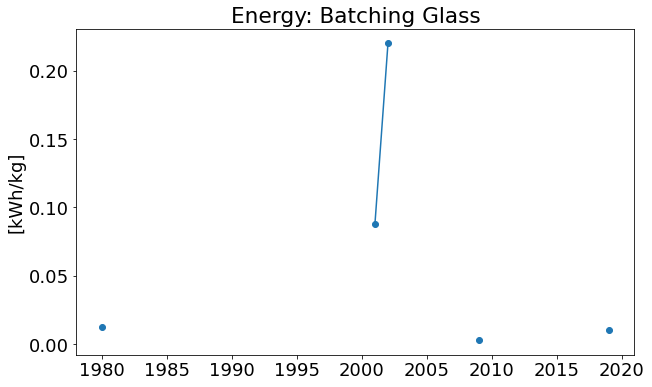

In [4]:
plt.plot(e_batchglass_raw.index,e_batchglass_raw.iloc[:,0], marker='o')
plt.title('Energy: Batching Glass')
plt.ylabel('[kWh/kg]')

The early 2000s data seems significantly higher than the other points. Both are trusted DOE sources. The UK data point assumes 50% cullet, which we know to be high for float/rolled glass, but in mixing, is seems like this wouldn't cause a significant difference in energy demand. Also, the UK value includes contributions from ethane/methane, implying a heating or drying energy demand not represented by the others.

Overall, all values are quite low on a kWh/kg basis, and the processing tools for this step have not changed significantly in the studied time frame. Therefore, we will average all values together for our baseline.

In [5]:
avg_batch_e = e_batchglass_raw.iloc[:,0].mean()
print('The average batching energy for glass making is '+str(round(avg_batch_e,3)) + ' kWh/kg.')

The average batching energy for glass making is 0.067 kWh/kg.


In [6]:
e_batchglass_trim = e_batchglass_raw.loc[1995:,['E_batchingGlass_kWhpkg','Prct_Fuel_batch']]

In [167]:
e_batchglass_trim['E_batchingGlass_kWhpkg']=avg_batch_e
e_batchglass_trim['Prct_Fuel_batch']=0.0
e_batchglass_trim.head(5)

,E_batchingGlass_kWhpkg,Prct_Fuel_batch
year,,
1995,0.066724,0.0
1996,0.066724,0.0
1997,0.066724,0.0
1998,0.066724,0.0
1999,0.066724,0.0


## Melting

The next step in glass manufacturing is the melting of the glass. This is seperated out in the literature from the forming, although the process is usually continuous. This step also involves a significant quantity of methane gas heating. We will note this important aspect in our accounting as a fraciton of the total energy neede for each step.

In [8]:
cwd = os.getcwd()
#skipcols = ['Source', 'Notes','Country']
e_meltrefine_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-glass-meltrefine.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [9]:
e_meltrefine_raw.dropna(how='all')

,E_melt_refine_total_kWhpkg,Prct_Fuel_melt,Source,Notes
year,,,,
1980,2.32,98.0,"H. L. Brown, Energy Analysis of 108 Industrial...",small batch potentially
1997,2.77,96.0,"J. L. Pellegrino, “Energy and Environmental Pr...","table 4-4, marketshare weighted for type of fu..."
2006,2.40,95.0,"E. Worrell, C. Galitsky, C. Galitsky, E. Masan...","marketshare weighted by furnace type, US surve..."
2019,2.14,77.0,"M. Zier, P. Stenzel, L. Kotzur, and D. Stolten...",total demand for M&R adjusted by overall energ...


In [10]:
e_meltrefine_raw.loc[2019,'Notes']

'total demand for M&R adjusted by overall energy carrier fraction (elec vs fuel) may be low for this step'

One of the fractions of methane is lower than the others. This is M. Zier, P. Stenzel, L. Kotzur, and D. Stolten, “A review of decarbonization options for the glass industry,” Energy Conversion and Management: X, vol. 10, p. 100083, Jun. 2021, doi: 10.1016/j.ecmx.2021.100083. and the energy was adjusted by the overall energy carrier for glass manufacturing in Germany. This may not be representative of the whole world, and it may also include more than just the melting step. Given that the other years are all in agreement, and the 77% is an average since the 1990s, we will remove this value and use the previous datapoint (95% from Worrell).

In [11]:
e_meltrefine = e_meltrefine_raw.copy()
e_meltrefine.loc[2019,'Prct_Fuel_melt'] = np.nan

#previous version used the average of all values, but this cause the fraction to rise again.
#e_meltrefine.loc[2019,'Prct_Fuel'] = round(e_meltrefine.loc[:,'Prct_Fuel'].mean(),0) 
#e_meltrefine.loc[2019,'Prct_Fuel']

Now we'll examine the energy totals.

Text(0, 0.5, '[kWh/kg]')

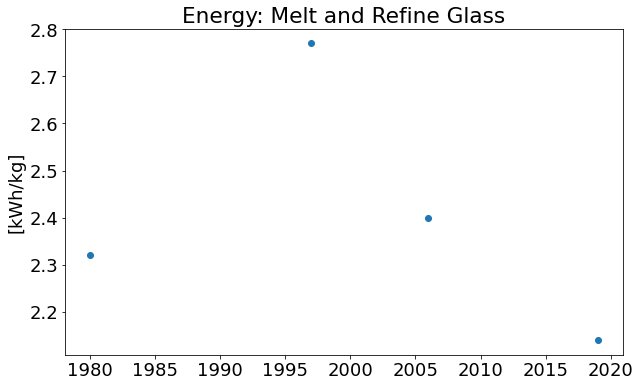

In [12]:
plt.plot(e_meltrefine.index,e_meltrefine.iloc[:,0], marker='o')
plt.title('Energy: Melt and Refine Glass')
plt.ylabel('[kWh/kg]')

The 1980 value is much lower than the 1997 value. This data point is from H. L. Brown, Energy Analysis of 108 Industrial Processes. The Fairmont Press, Inc., 1996. (note the publication date and the data date are not the same). and the noted batch size is a few pounds, meaning this is potentially a different scale of glass manufacturing than we are considering. Additionally, we only need to go back to 1995, therefore, we will drop this datapoint, and back propogate the 1997 data.

In [13]:
e_meltrefine_subrange = e_meltrefine.loc[1995:,['E_melt_refine_total_kWhpkg','Prct_Fuel_melt']]


Now we will interpolate to create a complete data set for history. It will hold the edge values constant forward and backward.

In [14]:
e_meltrefine_filled = e_meltrefine_subrange.interpolate(limit_direction='both')

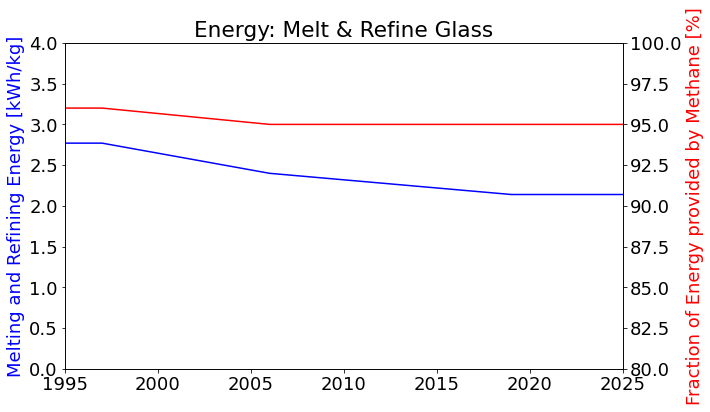

In [180]:
fig, ax1 = plt.subplots() 
#left axis
ax1.set_ylabel('Melting and Refining Energy [kWh/kg]', color='blue') 
ax1.plot(e_meltrefine_filled.index,e_meltrefine_filled.iloc[:,0], color='blue') 
ax1.set_ylim(0,4)
ax1.set_xlim(1995,2025)

#right axis
ax2 = ax1.twinx()
plt.ylabel('Fraction of Energy provided by Methane [%]', color='red')
ax2.plot(e_meltrefine_filled.index,e_meltrefine_filled.iloc[:,1], color='red')  
ax2.set_ylim(80,100)

plt.title('Energy: Melt & Refine Glass')

plt.show()

In [16]:
e_meltrefine_filled.to_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/output_energy_glass_meltrefine.csv")

## Forming
The next step in flat glass formation is forming the flat plate from the melt. There are many ways to do this; float glass entails the molten glass to drop into and float on a bath of molten tin; Rolled glass is drawn through cooled rollers. We will use these two processes interchangably here due to a lack of data.

In [17]:
cwd = os.getcwd()
#skipcols = ['Source', 'Notes','Country']
e_glassform_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-glassforming.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [18]:
e_glassform_raw.dropna(how='all')

,E_Glassforming_kWhpkg,Prct_Fuel_form,Source,Notes
year,,,,
1980,0.110,0.0,"H. L. Brown, Energy Analysis of 108 Industrial...",possibly small batch
1997,0.485,0.0,"J. L. Pellegrino, “Energy and Environmental Pr...","Table 5-2, tin bath heated by elec, all formin..."
2001,0.440,0.0,"E. Worrell, C. Galitsky, C. Galitsky, E. Masan...","US DOE 2002a, use only (exclude calculated los..."
2019,0.036,0.0,"M. Zier, P. Stenzel, L. Kotzur, and D. Stolten...","2019 German data, elec+fuel"


Text(0.5, 0, '[kWh/kg]')

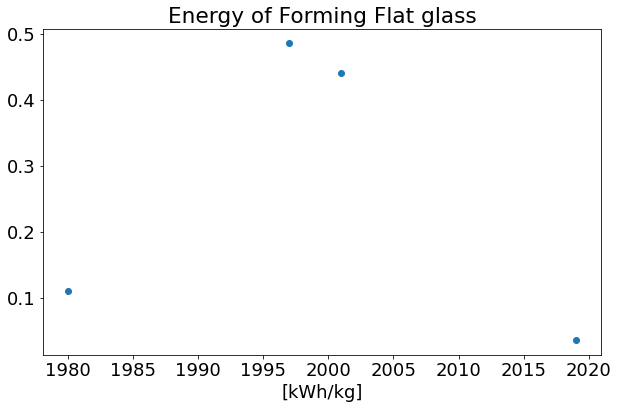

In [19]:
plt.plot(e_glassform_raw.index,e_glassform_raw['E_Glassforming_kWhpkg'], marker='o')
plt.title('Energy of Forming Flat glass')
plt.xlabel('[kWh/kg]')

Like the previous set of data, the 1980 datapoint seems unreasonably low, and we know this might potentially be a smaller scale than the other data. Therefore, we will exclude it and perform the same interpolation for the needed time range.

In [20]:
e_glassform = e_glassform_raw.loc[1995:,['E_Glassforming_kWhpkg','Prct_Fuel_form']]
e_glassform_filled = e_glassform.interpolate(limit_direction='both')

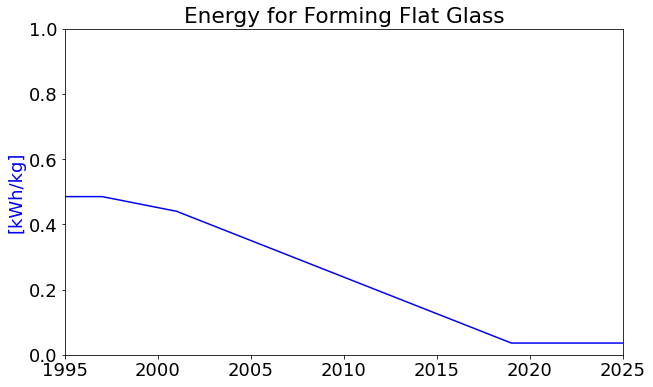

In [181]:
fig, ax1 = plt.subplots() 
#left axis
ax1.set_ylabel('[kWh/kg]', color='blue') 
ax1.plot(e_glassform_filled.index,e_glassform_filled.iloc[:,0], color='blue') 
ax1.set_ylim(0,1)
ax1.set_xlim(1995,2025)

#right axis
#ax2 = ax1.twinx()
#plt.ylabel('Fraction of Energy provided by Methane [%]', color='red')
#ax2.plot(e_glassform_filled.index,e_glassform_filled.iloc[:,1], color='red')  
#ax2.set_ylim(0,2)

plt.title('Energy for Forming Flat Glass')

plt.show()


In [22]:
e_glassform_filled.to_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/output_energy_glass_formflat.csv")

## Post Forming: Anneal and Temper

All PV flat glass for c-Si PV is tempered for safety reasons, and all tempered glass has already been annealed. Therefore, we will account for both the energy to anneal and temper the flat glass.

For Bifacial PV technology, the glasses are actually NOT tempered. They are heat treated instead. LOOK INTO DIFFERENCES IN THIS ENERGY DEMAND.

In [23]:
cwd = os.getcwd()
#skipcols = ['Source', 'Notes','Country']
e_glass_annealtemper_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-glass-postforming.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [24]:
e_glass_annealtemper_raw.dropna(how='all')

,E_GlassTempering_kWhpkg,Prct_fuel_annealtemper,Source,Notes
year,,,,
1980,0.48,95.0,"H. L. Brown, Energy Analysis of 108 Industrial...","1.2 lbs glass, annealing+cooling+tempering+pac..."
1997,0.81,95.0,"J. L. Pellegrino, “Energy and Environmental Pr...",includes annealing and tempering with marketsh...
2001,1.90,68.0,"E. Worrell, C. Galitsky, C. Galitsky, E. Masan...","US DOE 2002a, annealing = 0.03 MMBTU/ton, temp..."
2019,1.10,77.0,"M. Zier, P. Stenzel, L. Kotzur, and D. Stolten...","2019 German data, elec+fuel, unsure how much i..."


In [25]:
e_glass_annealtemper_raw.loc[1997,'Notes']

'includes annealing and tempering with marketshares of elec vs fuel gas tempering'

Text(0.5, 0, '[kWh/kg]')

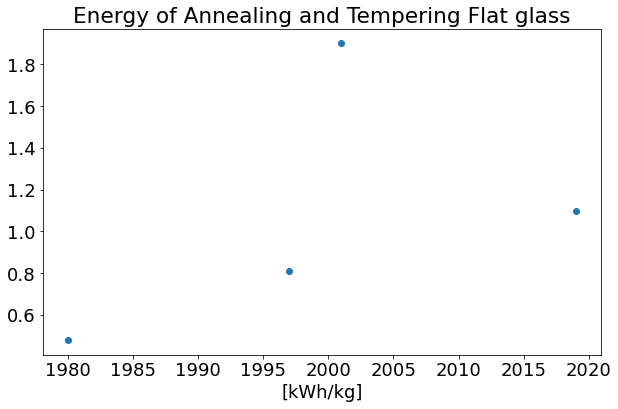

In [26]:
plt.plot(e_glass_annealtemper_raw.index,e_glass_annealtemper_raw['E_GlassTempering_kWhpkg'], marker='o')
plt.title('Energy of Annealing and Tempering Flat glass')
plt.xlabel('[kWh/kg]')

Once again, the 1980 datapoint seems excessively low and will therefore be excluded.

The jump between 1997 and 2001 data seems unlikely to be a trend and more attributable to differing methods of calculating the energy requirements. The modern datapoint falls between these two points. Therefore, like for the batching energy, we wil take an average of these 3 points and use that for all time. 

In [27]:
e_glass_annealtemper_trim = e_glass_annealtemper_raw.loc[1995:,['E_GlassTempering_kWhpkg','Prct_fuel_annealtemper']]

In [166]:
avg_annealtemper_e = e_glass_annealtemper_trim.iloc[:,0].mean()
avg_prctfuel_annealtemper = e_glass_annealtemper_trim.iloc[:,1].mean()
e_glass_annealtemper_trim['E_GlassTempering_kWhpkg']= avg_annealtemper_e
e_glass_annealtemper_trim['Prct_fuel_annealtemper']= avg_prctfuel_annealtemper
e_glass_annealtemper_trim.head(5)

,E_GlassTempering_kWhpkg,Prct_fuel_annealtemper
year,,
1995,1.27,80.0
1996,1.27,80.0
1997,1.27,80.0
1998,1.27,80.0
1999,1.27,80.0


## Combine All MFG energy

For the energy baseline to match up with the mass baseline, we are separating the energy demands into virgin material, transport, and manufacturing energy. This journal covers the Manufacturing energy, batch processing through forming and cutting. The following calculation sum all the energies associate with manufacturing at the flat glass facility.

To track the use of methane/natural gas in the processing, we will do a weighted average percent fuel column to accompany the total energy value.

In [165]:
dfs = [e_batchglass_trim, e_meltrefine_filled, e_glassform_filled, e_glass_annealtemper_trim]
energies_mfg_glass = pd.concat(dfs, axis=1, keys = ['batch','melt','form','anneal'])
energies_mfg_glass.head(5)

batch                                       melt  \
     E_batchingGlass_kWhpkg Prct_Fuel_batch E_melt_refine_total_kWhpkg   
year                                                                     
1995               0.066724             0.0                   2.770000   
1996               0.066724             0.0                   2.770000   
1997               0.066724             0.0                   2.770000   
1998               0.066724             0.0                   2.728889   
1999               0.066724             0.0                   2.687778   

                                     form                 \
     Prct_Fuel_melt E_Glassforming_kWhpkg Prct_Fuel_form   
year                                                       
1995      96.000000               0.48500            0.0   
1996      96.000000               0.48500            0.0   
1997      96.000000               0.48500            0.0   
1998      95.888889               0.47375            0.0   
1999      95.777778               0.46250            0.0   

                      anneal                         
     E_GlassTempering_kWhpkg Prct_fuel_annealtemper  
year                                                 
1995                    1.27                   80.0  
1996                    1.27                   80.0  
1997                    1.27                   80.0  
1998                    1.27                   80.0  
1999                    1.27                   80.0

In [164]:
#Sum the manufacturing energies
energies_mfg_glass['sum','E_mfg_glass_kWhpkg'] = energies_mfg_glass.filter(like='E_').sum(axis=1)
energies_mfg_glass.head(5)

batch                                       melt  \
     E_batchingGlass_kWhpkg Prct_Fuel_batch E_melt_refine_total_kWhpkg   
year                                                                     
1995               0.066724             0.0                   2.770000   
1996               0.066724             0.0                   2.770000   
1997               0.066724             0.0                   2.770000   
1998               0.066724             0.0                   2.728889   
1999               0.066724             0.0                   2.687778   

                                     form                 \
     Prct_Fuel_melt E_Glassforming_kWhpkg Prct_Fuel_form   
year                                                       
1995      96.000000               0.48500            0.0   
1996      96.000000               0.48500            0.0   
1997      96.000000               0.48500            0.0   
1998      95.888889               0.47375            0.0   
1999      95.777778               0.46250            0.0   

                      anneal                                       sum  
     E_GlassTempering_kWhpkg Prct_fuel_annealtemper E_mfg_glass_kWhpkg  
year                                                                    
1995                    1.27                   80.0           9.183447  
1996                    1.27                   80.0           9.183447  
1997                    1.27                   80.0           9.183447  
1998                    1.27                   80.0           9.078725  
1999                    1.27                   80.0           8.974003

In [163]:
#Take weighted average of PRCT Fuel by energy step
wting_factors = energies_mfg_glass.filter(like='E_')
wting_factors = wting_factors.div(energies_mfg_glass['sum','E_mfg_glass_kWhpkg'], axis=0)
#wting_factors.drop('E_mfg_glass_kWhpkg', axis=1, inplace=True)
wting_factors.head(5)

,batch,melt,form,anneal,sum
,E_batchingGlass_kWhpkg,E_melt_refine_total_kWhpkg,E_Glassforming_kWhpkg,E_GlassTempering_kWhpkg,E_mfg_glass_kWhpkg
year,,,,,
1995,0.014531,0.603259,0.105625,0.276585,1.0
1996,0.014531,0.603259,0.105625,0.276585,1.0
1997,0.014531,0.603259,0.105625,0.276585,1.0
1998,0.014699,0.601161,0.104365,0.279775,1.0
1999,0.014870,0.599014,0.103076,0.283040,1.0


In [141]:
fuel_fraction = energies_mfg_glass.filter(like='Prct_')
fuel_fraction.columns.levels[0]

Index(['batch', 'melt', 'form', 'anneal', 'sum'], dtype='object')

In [142]:
#drop the column name levels to leave the process steps, allowing multiplication
wting_factors.columns = wting_factors.columns.droplevel(1)
fuel_fraction.columns = fuel_fraction.columns.droplevel(1)

In [144]:
wtd_fuel_fraction = wting_factors.mul(fuel_fraction, axis = 1) #multiply fraction of energy/step * PRCT Fuel fraction
wtd_fuel_fraction['sum'] = wtd_fuel_fraction.sum(axis=1) #sum the fuel fraction

In [162]:
e_mfg_glass_output = pd.concat([energies_mfg_glass['sum','E_mfg_glass_kWhpkg'], wtd_fuel_fraction['sum']], axis=1)
e_mfg_glass_output.columns=['E_mfg_glass_kWhpkg','Prct_fuel']
e_mfg_glass_output.head(5)

,E_mfg_glass_kWhpkg,Prct_fuel
year,,
1995,4.591724,80.039660
1996,4.591724,80.039660
1997,4.591724,80.039660
1998,4.539363,80.026683
1999,4.487001,80.015438


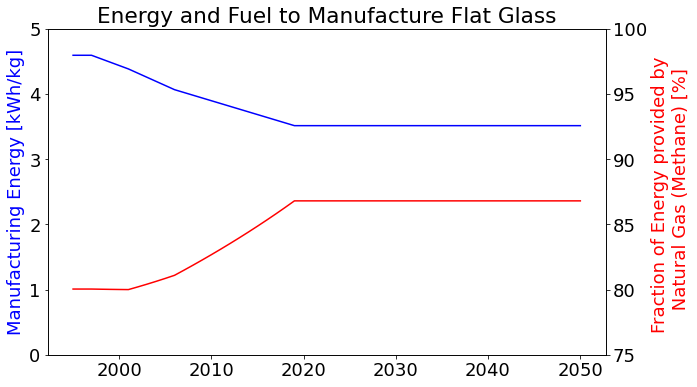

In [177]:
fig, ax1 = plt.subplots() 
#left axis
ax1.set_ylabel('Manufacturing Energy [kWh/kg]', color='blue') 
ax1.plot(e_mfg_glass_output.index,e_mfg_glass_output.iloc[:,0], color='blue') 
ax1.set_ylim(0,5)

#right axis
ax2 = ax1.twinx()
plt.ylabel('Fraction of Energy provided by \n Natural Gas (Methane) [%]', color='red')
ax2.plot(e_mfg_glass_output.index,e_mfg_glass_output.iloc[:,1], color='red')  
ax2.set_ylim(75,100)

plt.title('Energy and Fuel to Manufacture Flat Glass')

plt.show()

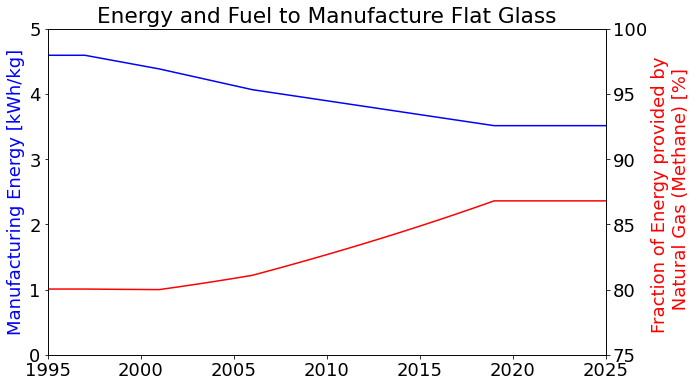

In [179]:
fig, ax1 = plt.subplots() 
#left axis
ax1.set_ylabel('Manufacturing Energy [kWh/kg]', color='blue') 
ax1.plot(e_mfg_glass_output.index,e_mfg_glass_output.iloc[:,0], color='blue') 
ax1.set_ylim(0,5)
ax1.set_xlim(1995,2025)

#right axis
ax2 = ax1.twinx()
plt.ylabel('Fraction of Energy provided by \n Natural Gas (Methane) [%]', color='red')
ax2.plot(e_mfg_glass_output.index,e_mfg_glass_output.iloc[:,1], color='red')  
ax2.set_ylim(75,100)

plt.title('Energy and Fuel to Manufacture Flat Glass')

plt.show()

In [161]:
e_mfg_glass_output.to_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/output_energy_glass_MFG_FUEL.csv")